In [ ]:
# Importing required libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
sns.set_style('whitegrid')
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Loading dataset

In [2]:
dataset = pd.read_csv("Churn_Modelling.csv")

In [ ]:
# Firsr few rows

In [5]:
dataset.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
# Last few rows

In [6]:
dataset.tail(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
# shape of dataset

In [7]:
dataset.shape

(10000, 14)

In [ ]:
# a brief of dataset

In [8]:
pd.DataFrame({"TotalMissing":dataset.isna().sum(),"%Missing":dataset.isna().mean(),"DataType":dataset.dtypes,"Unique":dataset.nunique()})

,TotalMissing,%Missing,DataType,Unique
RowNumber,0,0.0,int64,10000
CustomerId,0,0.0,int64,10000
Surname,0,0.0,object,2932
CreditScore,0,0.0,int64,460
Geography,0,0.0,object,3
Gender,0,0.0,object,2
Age,0,0.0,int64,70
Tenure,0,0.0,int64,11
Balance,0,0.0,float64,6382
NumOfProducts,0,0.0,int64,4


In [ ]:
# Listing all column names

In [9]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
# Basic stats value

In [10]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Exploratory Data Analysis

In [ ]:
# Lets see our target column distribution

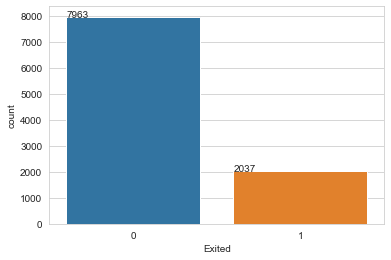

In [8]:
fig=sns.countplot(x=dataset["Exited"])
for i in fig.patches:
    fig.annotate(i.get_height(),(i.get_x(),i.get_height()))

In [ ]:
# Lets see how gender affect the target column

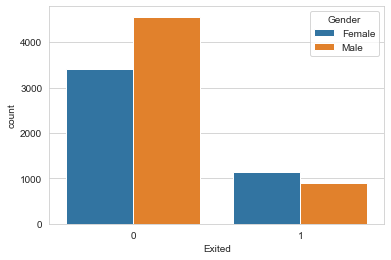

In [10]:
sns.countplot(x="Exited",hue="Gender",data=dataset)

In [ ]:
'''
More females have exited then male
'''

In [ ]:
# Lets see whether geography has an impact on target

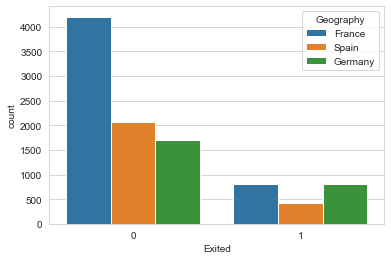

In [11]:
sns.countplot(x="Exited",hue="Geography",data=dataset)

In [ ]:
# Like this we can find relationship by plotting graphs 

In [ ]:
# Data Processing

In [ ]:
# As we can infer from just eyeballing the dataset that first 3 columns are not useful, dropping them from consideration

In [13]:
dataset.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [ ]:
# Converting all object datatype varibale to int

In [17]:
le=LabelEncoder()
dataset["Gender"]=le.fit_transform(dataset["Gender"])
dataset["Geography"]=le.fit_transform(dataset["Geography"])

In [ ]:
# Lets look at the dataset

In [19]:
dataset.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
# Lets divide our dataset into dependent and independent dataset

In [31]:
y=dataset["Exited"]
x=dataset.drop("Exited",axis=1)

In [ ]:
# Train test split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
# Lets see the shape of splitted dataset

In [33]:
print("shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (7000, 10)
shape of y_train: (7000,)
shape of x_test: (3000, 10)
shape of y_test: (3000,)


In [ ]:
# Feature scaling

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
# Lets make ANN

In [ ]:
# Importing required libraries 

In [40]:
import keras
from keras.models import Sequential # responsible for creating NN
from keras.layers import Dense  # to create hidden layers
from keras.layers import Dropout 
# Dropout is a regularization parameter,used when NN is quiet deep 

Using TensorFlow backend.


In [ ]:
# Initialising the ANN

In [41]:
classifier=Sequential()
# This will create an empty NN

In [ ]:
# adding input layer and first hiddden layer

In [42]:
classifier.add(Dense(units=6,kernel_initializer="he_uniform",activation="relu",input_dim=10))

In [ ]:
# Dense: to create first hidden layer
# units: in first hidden layer 6 neurons
# kernel_initializer: how weights should be initialized,whenever we use relu activation
# weight initializer he_uniform and he_normal works well
# input_dim: relates to input variables
# all hidden layers should contain relu or leaky relu as activation function
# relu prevents vanishing gradient descent problem issues as compared to sigmoid

In [ ]:
# creating second hidden layers

In [43]:
classifier.add(Dense(units=6,kernel_initializer="he_uniform",activation="relu"))

In [ ]:
# adding the output layers

In [44]:
classifier.add(Dense(units=1,kernel_initializer="glorot_uniform",activation="sigmoid"))

In [ ]:
# units: only one output layer as this is binary classification problem,if it value
# comes greater than 0.5 then answer will be 1
# activation: sigmoid will convert values to 0 and 1 its derivative lies b/w 0-0.25

In [ ]:
# summary of model

In [45]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the ANN

In [46]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
# fitting the ann to the training set

In [47]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Train on 4689 samples, validate on 2311 samples
Epoch 1/100
4689/4689 [==============================] - 4s 755us/step - loss: 0.5394 - accuracy: 0.7795 - val_loss: 0.5146 - val_accuracy: 0.7893
Epoch 2/100
4689/4689 [==============================] - 2s 460us/step - loss: 0.4860 - accuracy: 0.7940 - val_loss: 0.4863 - val_accuracy: 0.7893
Epoch 3/100
4689/4689 [==============================] - 1s 300us/step - loss: 0.4645 - accuracy: 0.7940 - val_loss: 0.4684 - val_accuracy: 0.7893
Epoch 4/100
4689/4689 [==============================] - 1s 284us/step - loss: 0.4506 - accuracy: 0.7940 - val_loss: 0.4558 - val_accuracy: 0.7893
Epoch 5/100
4689/4689 [==============================] - 2s 427us/step - loss: 0.4417 - accuracy: 0.7936 - val_loss: 0.4491 - val_accuracy: 0.7927
Epoch 6/100
4689/4689 [==============================] - 2s 461us/step - loss: 0.4355 - accuracy: 0.7970 - val_loss: 0.4434 - val_accuracy: 0.8005
Epoch 7/100
4689/4689 [==============================] - 2s 342us/step

4689/4689 [==============================] - 2s 357us/step - loss: 0.3329 - accuracy: 0.8592 - val_loss: 0.3618 - val_accuracy: 0.8516
Epoch 57/100
4689/4689 [==============================] - 2s 491us/step - loss: 0.3327 - accuracy: 0.8601 - val_loss: 0.3612 - val_accuracy: 0.8516
Epoch 58/100
4689/4689 [==============================] - 1s 296us/step - loss: 0.3326 - accuracy: 0.8592 - val_loss: 0.3604 - val_accuracy: 0.8516
Epoch 59/100
4689/4689 [==============================] - 2s 377us/step - loss: 0.3322 - accuracy: 0.8612 - val_loss: 0.3603 - val_accuracy: 0.8511
Epoch 60/100
4689/4689 [==============================] - 2s 449us/step - loss: 0.3321 - accuracy: 0.8603 - val_loss: 0.3618 - val_accuracy: 0.8520
Epoch 61/100
4689/4689 [==============================] - 2s 485us/step - loss: 0.3327 - accuracy: 0.8588 - val_loss: 0.3609 - val_accuracy: 0.8507
Epoch 62/100
4689/4689 [==============================] - 3s 539us/step - loss: 0.3323 - accuracy: 0.8599 - val_loss: 0.3606 

In [ ]:
# validation split= test dataset separately
# batch size: should be less so that computation power be less,more number of 
# records we dont have to load at one time, ram will be free

In [ ]:
# now test it on test dataset

In [54]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

In [ ]:
# Making confusion matrix

In [52]:
from sklearn.metrics import confusion_matrix

In [55]:
confusion_matrix(y_test,y_pred)

array([[2326,   90],
       [ 312,  272]], dtype=int64)

In [ ]:
# calculate the accuracy for test dataset

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
score=accuracy_score(y_pred,y_test)
print(score)

0.866


In [ ]:
# Lets use some other activtion func with some more added hidden layers 

In [59]:
classifier=Sequential()
classifier.add(Dense(units=10,kernel_initializer="he_normal",activation="relu",input_dim=10))
classifier.add(Dense(units=20,kernel_initializer="he_normal",activation="relu"))
classifier.add(Dense(units=15,kernel_initializer="he_normal",activation="relu"))
classifier.add(Dense(units=1,kernel_initializer="glorot_uniform",activation="sigmoid"))
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Train on 4689 samples, validate on 2311 samples
Epoch 1/50
4689/4689 [==============================] - 2s 527us/step - loss: 0.5546 - accuracy: 0.7505 - val_loss: 0.4749 - val_accuracy: 0.7997
Epoch 2/50
4689/4689 [==============================] - 1s 298us/step - loss: 0.4432 - accuracy: 0.8102 - val_loss: 0.4422 - val_accuracy: 0.8079
Epoch 3/50
4689/4689 [==============================] - 1s 300us/step - loss: 0.4183 - accuracy: 0.8153 - val_loss: 0.4210 - val_accuracy: 0.8209
Epoch 4/50
4689/4689 [==============================] - 3s 579us/step - loss: 0.3986 - accuracy: 0.8305 - val_loss: 0.4022 - val_accuracy: 0.8356
Epoch 5/50
4689/4689 [==============================] - 2s 505us/step - loss: 0.3804 - accuracy: 0.8426 - val_loss: 0.3983 - val_accuracy: 0.8343
Epoch 6/50
4689/4689 [==============================] - 2s 494us/step - loss: 0.3705 - accuracy: 0.8454 - val_loss: 0.3854 - val_accuracy: 0.8390
Epoch 7/50
4689/4689 [==============================] - 2s 511us/step - loss

In [60]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred > 0.5)
cm=confusion_matrix(y_test,y_pred)
print(cm)
score=accuracy_score(y_pred,y_test)
print(score)

[[2315  101]
 [ 329  255]]
0.8566666666666667


In [ ]:
# if still we want to increase accuracy then addinf hidden layer will overfit 
# here we are using Dropout to increase accuracy

In [61]:
classifier=Sequential()
classifier.add(Dense(units=10,kernel_initializer="he_normal",activation="relu",input_dim=10))
classifier.add(Dropout(0.3))  # adding dropout
classifier.add(Dense(units=20,kernel_initializer="he_normal",activation="relu"))
classifier.add(Dropout(0.4))
classifier.add(Dense(units=15,kernel_initializer="he_normal",activation="relu"))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=1,kernel_initializer="glorot_uniform",activation="sigmoid"))
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Train on 4689 samples, validate on 2311 samples
Epoch 1/50
4689/4689 [==============================] - 4s 781us/step - loss: 0.6310 - accuracy: 0.7091 - val_loss: 0.5003 - val_accuracy: 0.7893
Epoch 2/50
4689/4689 [==============================] - 2s 489us/step - loss: 0.5170 - accuracy: 0.7884 - val_loss: 0.4869 - val_accuracy: 0.7893
Epoch 3/50
4689/4689 [==============================] - 3s 677us/step - loss: 0.4925 - accuracy: 0.7925 - val_loss: 0.4733 - val_accuracy: 0.7893
Epoch 4/50
4689/4689 [==============================] - 3s 681us/step - loss: 0.4863 - accuracy: 0.7940 - val_loss: 0.4681 - val_accuracy: 0.7893
Epoch 5/50
4689/4689 [==============================] - 3s 633us/step - loss: 0.4818 - accuracy: 0.7948 - val_loss: 0.4653 - val_accuracy: 0.7893
Epoch 6/50
4689/4689 [==============================] - 3s 653us/step - loss: 0.4730 - accuracy: 0.7948 - val_loss: 0.4573 - val_accuracy: 0.7893
Epoch 7/50
4689/4689 [==============================] - 3s 682us/step - loss

In [62]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred > 0.5)
cm=confusion_matrix(y_test,y_pred)
print(cm)
score=accuracy_score(y_pred,y_test)
print(score)

[[2274  142]
 [ 340  244]]
0.8393333333333334


In [ ]:
# Evaluating model

In [63]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [64]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 10))
    classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'relu'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [66]:
kerasClassifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 50)
accuracies = cross_val_score(estimator = kerasClassifier, 
                             X = x_train, 
                             y = y_train, 
                             cv = 10,
                             n_jobs = -1,
                             verbose = 2,
                             scoring = 'accuracy')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  2.3min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.6min finished


In [67]:
print("Mean accuracy: {:.2f}".format(accuracies.mean()))
print("Variance accuracy: {:.2f}".format(accuracies.std()))

Mean accuracy: 0.82
Variance accuracy: 0.03


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


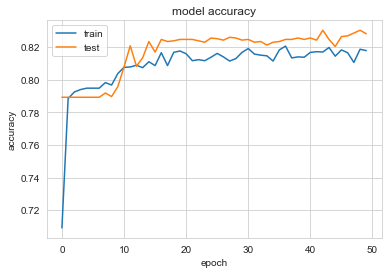

In [73]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

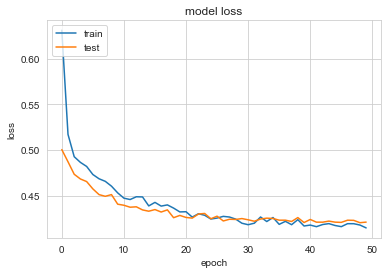

In [74]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()